# First Partial Exam Part II
## By Arturo Fornés Arvayo A01227071

## Tabla de Contenidos

1. [Sentiment analysis de la columna "description"](#1-Sentiment-analysis-de-la-columna-"description")
2. [Crea la columna "length" que tenga la cantidad de palabras de "description"](#2-Crea-la-columna-"length"-que-tenga-la-cantidad-de-palabras-de-"description")
3. [Grafica un heatmap con la correlación entre las variables "neg", "neu", "pos", "compound", "length", "price", y "points"](#3-Grafica-un-heatmap-con-la-correlación-entre-las-variables-"neg",-"neu",-"pos",-"compound",-"length",-"price",-y-"points")
4. [¿Cuáles variables muestran mayor correlación?](#4-¿Cuáles-variables-muestran-mayor-correlación?)
5. [Normaliza "length", "price", "points", "neg", "pos" en el rango [ 0, 1 ] y grafica los scatterplots de todos ellos](#5-Normaliza-"length",-"price",-"points",-"neg",-"pos"-en-el-rango-[-0,-1-]-y-grafica-los-scatterplots-de-todos-ellos)
6. [¿Cuáles son las dos variedades con mejor puntaje y cuáles son las dos variedades con menor puntaje?](#6-¿Cuáles-son-las-dos-variedades-con-mejor-puntaje-y-cuáles-son-las-dos-variedades-con-menor-puntaje?)
7. [Grafica el histograma de precios de la variedad "Tempranillo" ("Tempranillo Merlot") y "Chardonnay"](#7-Grafica-el-histograma-de-precios-de-la-variedad-"Tempranillo"-("Tempranillo-Merlot")-y-"Chardonnay")
8. [Haz un barplot del precio promedio de las siguientes variedades](#8-Haz-un-barplot-del-precio-promedio-de-las-siguientes-variedades:)
9. [Haz un barplot del puntaje promedio de las siguientes variedades](#9-Haz-un-barplot-del-puntaje-promedio-de-las-siguientes-variedades:)
10. [¿Cuál es la provincia con los vinos mejor calificados en promedio?](#10-¿Cuál-es-la-provincia-con-los-vinos-mejor-calificados-en-promedio?)
11. [¿Cuál es la provincia con los vinos más caros en promedio?](#11-¿Cuál-es-la-provincia-con-los-vinos-más-caros-en-promedio?)
12. [La variable "designation" tiene varios datos perdidos. ¿Cómo tratarías esos datos?](#12-La-variable-"designation"-tiene-varios-datos-perdidos.-¿Cómo-tratarías-esos-datos?)
13. [¿Cuáles son las 5 palabras más comunes de la descripción de los vinos en el cuartil q3 de puntos y en el cuartil q3 de precio?](#13-¿Cuáles-son-las-5-palabras-más-comunes-de-la-descripción-de-los-vinos-en-el-cuartil-q3-de-puntos-y-en-el-cuartil-q3-de-precio?)
14. [¿Cuáles son las 5 palabras más comunes de la descripción de los vinos en el cuartil q1 de puntos y en el cuartil q1 de precio?](#14-¿Cuáles-son-las-5-palabras-más-comunes-de-la-descripción-de-los-vinos-en-el-cuartil-q1-de-puntos-y-en-el-cuartil-q1-de-precio?)

In [1]:
import seaborn as sns
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [2]:
wine = pd.read_csv("winemag-data-130k-v2.csv")
wine.head(3)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   

    designation  points  price           province           region_1  \
0  Vulkà Bianco      87    NaN  Sicily & Sardinia               Etna   
1      Avidagos      87   15.0              Douro                NaN   
2           NaN      87   14.0             Oregon  Willamette Valley   

            region_2    taster_name taster_twitter_handle  \
0                NaN  Kerin O’Keefe          @kerinokeefe   
1                NaN     Roger Voss            @vossroger   
2  Willamette Valley   Paul Gregutt           @paulgwine    

                                           title         variety  \
0              Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2  Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm

## 1 Sentiment analysis de la columna "description"

In [3]:
analyzer.polarity_scores(wine.loc[0]["description"])

{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'compound': 0.1531}

In [4]:
wine.shape

(129971, 14)

In [11]:
sentiment_scores = [analyzer.polarity_scores(description) for description in wine["description"]]

In [12]:
df = pd.DataFrame(sentiment_scores)
wine["neg"] = df["neg"]
wine["neu"] = df["neu"]
wine["pos"] = df["pos"]
wine["compound"] = df["compound"]

In [13]:
wine[["description", "neg", "neu", "pos", "compound"]].head()

description    neg    neu    pos  \
0  Aromas include tropical fruit, broom, brimston...  0.000  0.935  0.065   
1  This is ripe and fruity, a wine that is smooth...  0.000  0.868  0.132   
2  Tart and snappy, the flavors of lime flesh and...  0.053  0.947  0.000   
3  Pineapple rind, lemon pith and orange blossom ...  0.000  0.926  0.074   
4  Much like the regular bottling from 2012, this...  0.000  0.805  0.195   

   compound  
0    0.1531  
1    0.6486  
2   -0.1280  
3    0.3400  
4    0.8176

## 2 Crea la columna "length" que tenga la cantidad de palabras de "description"

In [14]:
wine["length"] = [len(description.split()) for description in wine["description"]]

In [15]:
wine.head(3)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   

    designation  points  price           province           region_1  \
0  Vulkà Bianco      87    NaN  Sicily & Sardinia               Etna   
1      Avidagos      87   15.0              Douro                NaN   
2           NaN      87   14.0             Oregon  Willamette Valley   

            region_2    taster_name taster_twitter_handle  \
0                NaN  Kerin O’Keefe          @kerinokeefe   
1                NaN     Roger Voss            @vossroger   
2  Willamette Valley   Paul Gregutt           @paulgwine    

                                           title         variety  \
0              Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2  Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   

                winery    neg    neu    pos  compound  length  
0              Nicosia  0.000  0.935  0.065    0.1531      24  
1  Quinta dos Avidagos  0.000  0.868  0.132    0.6486      38  
2            Rainstorm  0.053  0.947  0.000   -0.1280      28

## 3 Grafica un heatmap con la correlación entre las variables "neg", "neu", "pos", "compound", "length", "price", y "points"

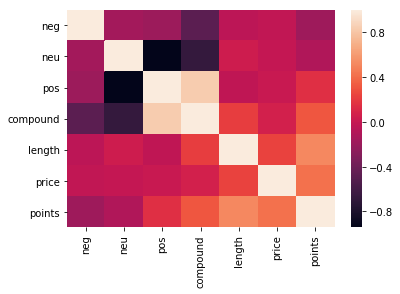

In [16]:
sns.heatmap(wine[["neg", "neu", "pos", "compound", "length", "price", "points"]].corr())

## 4 ¿Cuáles variables muestran mayor correlación?

La mayor correlación se ve entre los siguientes pares de variables:
1. pos y compound
2. length y points
3. price y points
4. compound y points

Y le siguen los siguientes pares con una ligera correlación:
5. length y price
6. length y compound
7. pos y points

## 5 Normaliza "length", "price", "points", "neg", "pos" en el rango [ 0, 1 ] y grafica los scatterplots de todos ellos

Plotearé el valor de uno de los campos por normalizar antes de la normalización y después de la normalización para que se pueda apreciar el cambio.

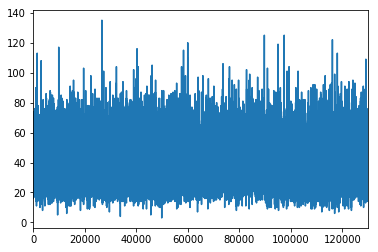

In [18]:
wine["length"].plot.line()

In [19]:
normalized_wine = wine.copy(deep=True)
wine["length"] = (wine["length"] - wine["length"].min()) / (wine["length"].max() - wine["length"].min())
wine["price"] = (wine["price"] - wine["price"].min()) / (wine["price"].max() - wine["price"].min())
wine["points"] = (wine["points"] - wine["points"].min()) / (wine["points"].max() - wine["points"].min())
wine["neg"] = (wine["neg"] - wine["neg"].min()) / (wine["neg"].max() - wine["neg"].min())
wine["pos"] = (wine["pos"] - wine["pos"].min()) / (wine["pos"].max() - wine["pos"].min())

Como se puede observar, la forma de los datos no cambiaron, sólo el rango de los valores.

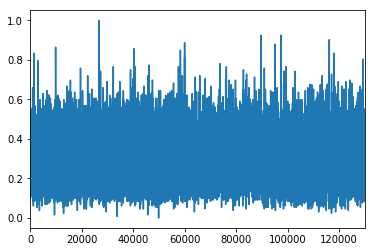

In [21]:
wine["length"].plot.line()

/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


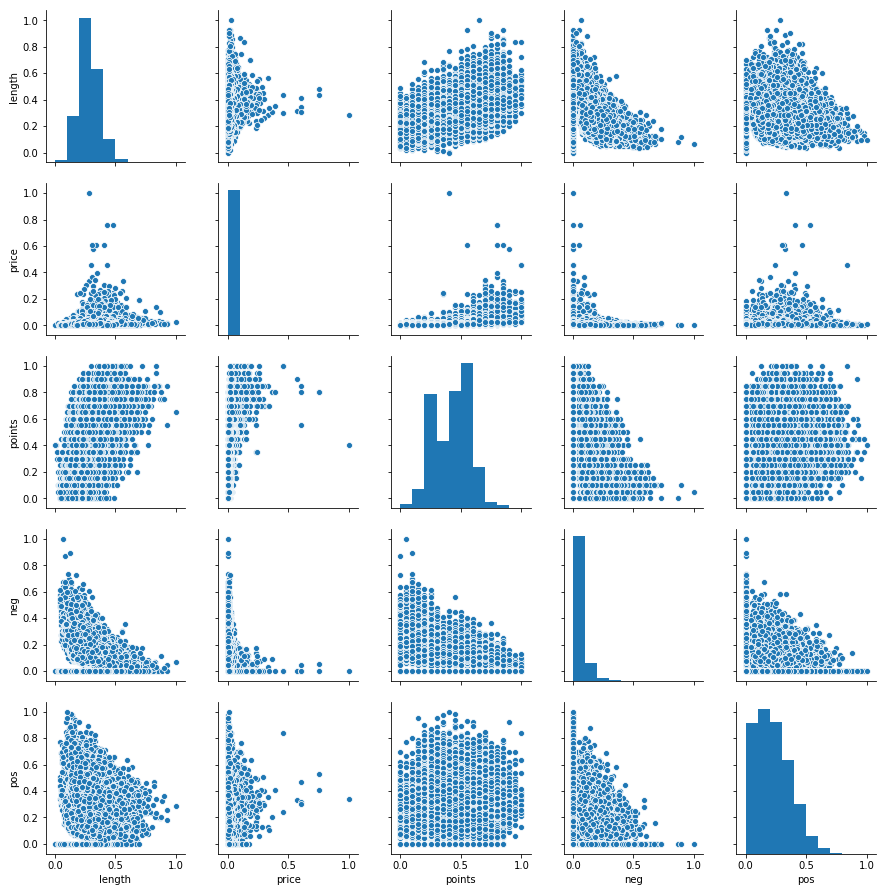

In [22]:
sns.pairplot(wine[["length", "price", "points", "neg", "pos"]])

## 6 ¿Cuáles son las dos variedades con mejor puntaje y cuáles son las dos variedades con menor puntaje?

### Top 2 Variedades, utilizando el promedio

Gelber Traminer y Terrantez

variety
Gelber Traminer    0.75
Terrantez          0.75
Name: points, dtype: float64


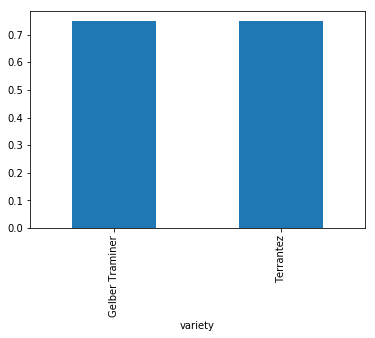

In [70]:
top_points_variety = wine.groupby("variety")["points"].mean().sort_values(ascending=False)[:2]
print(top_points_variety)
top_points_variety.plot.bar()

### Top 2 variedades, utilizando la lista completa de vinos

Port y Chardonnay

In [69]:
wine.sort_values("points", ascending=False)[["variety", "points"]][:2]

variety  points
114972        Port     1.0
89729   Chardonnay     1.0

### Bottom 2 Variedades, utilizando el promedio

Chancellor y Airen

variety
Chancellor    0.025000
Airen         0.083333
Name: points, dtype: float64


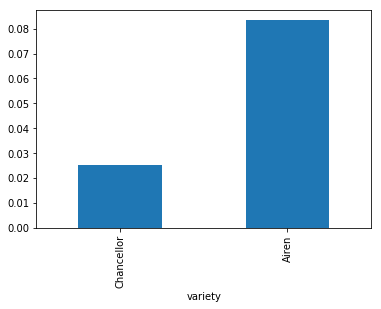

In [89]:
bottom_points_variety = wine.groupby("variety")["points"].mean().sort_values(ascending=True).dropna()[:2]
print(bottom_points_variety)
bottom_points_variety.plot.bar()

### Bottom 2 variedades, utilizando la lista completa de vinos

Cabernet Sauvignon y Merlot

In [71]:
wine.sort_values("points", ascending=True)[["variety", "points"]][:2]

variety  points
118056  Cabernet Sauvignon     0.0
35516               Merlot     0.0

## 7 Grafica el histograma de precios de la variedad "Tempranillo" ("Tempranillo-Merlot") y "Chardonnay"

### Tempranillo-Merlot

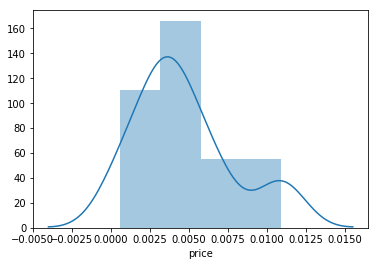

In [24]:
sns.distplot(wine[wine["variety"] == "Tempranillo-Merlot"]["price"])

### Chardonnay

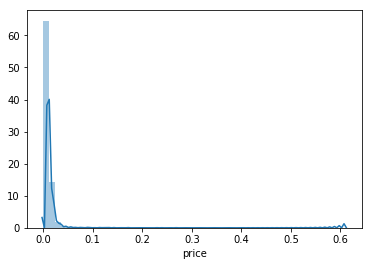

In [25]:
sns.distplot(wine[wine["variety"] == "Chardonnay"]["price"].dropna())

## 8 Haz un barplot del precio promedio de las siguientes variedades:
### Chardonnay, Tempranillo-Merlot, Merlot, Syrah, Zinfandel,  Pinot Noir

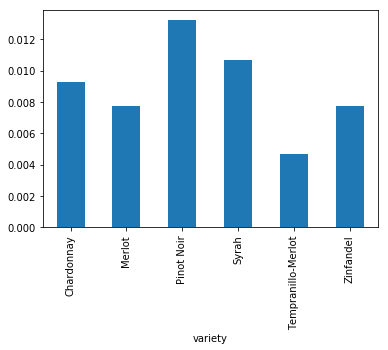

In [28]:
wine[wine["variety"].isin(["Chardonnay", "Tempranillo-Merlot", "Merlot", "Syrah", "Zinfandel", "Pinot Noir"])].groupby("variety")["price"].mean().plot.bar()
# Price

## 9 Haz un barplot del puntaje promedio de las siguientes variedades:
### Chardonnay, Tempranillo-Merlot, Merlot, Syrah, Zinfandel,  Pinot Noir

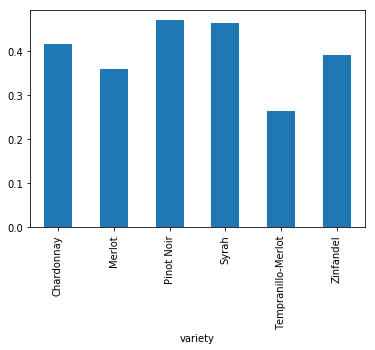

In [27]:
wine[wine["variety"].isin(["Chardonnay", "Tempranillo-Merlot", "Merlot", "Syrah", "Zinfandel", "Pinot Noir"])].groupby("variety")["points"].mean().plot.bar()
# Points

## 10 ¿Cuál es la provincia con los vinos mejor calificados en promedio?
### Obtendré el Top 5

La provincia con los vinos mejor calificados en promedio es **Südburgenland**

province
Südburgenland    0.700000
Madeira          0.661538
Mittelrhein      0.600000
Puente Alto      0.586667
Wachau           0.581020
Name: points, dtype: float64


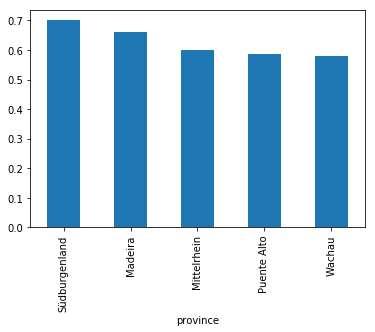

In [31]:
top_points = wine.groupby("province")["points"].mean().sort_values(ascending=False).dropna()[:5]
print(top_points)
top_points.plot.bar()

## 11 ¿Cuál es la provincia con los vinos más caros en promedio?
### Obtendré el Top 5

La provincia con los vinos mejor calificados en promedio es **Colares**

province
Colares              0.078428
Vânju Mare           0.049150
Switzerland          0.047330
Madeira              0.033732
Moscatel do Douro    0.030097
Name: price, dtype: float64


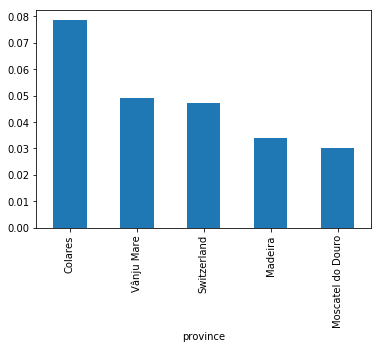

In [32]:
top_price = wine.groupby("province")["price"].mean().sort_values(ascending=False).dropna()[:5]
print(top_price)
top_price.plot.bar()

## 12 La variable "designation" tiene varios datos perdidos. ¿Cómo tratarías esos datos?

El tipo de valor es nominal categórico y tiene muchos valores únicos, para situaciones donde se requiera realizar operaciones con designation eliminaría las entradas con ese valor perdido. No eliminaría las entradas para operaciones que no utilicen esta variable.

## 13 ¿Cuáles son las 5 palabras más comunes de la descripción de los vinos en el cuartil q3 de puntos y en el cuartil q3 de precio?

#### Primero ordeno el Dataframe por puntos y por precio

In [88]:
import numpy as np
sorted_by_points = wine.sort_values("points", ascending=True)
sorted_by_points.head(2)

Unnamed: 0 country                                        description  \
118056      118056      US  This wine has very little going on aromaticall...   
35516        35516      US  This Merlot has not fully ripened, with aromas...   

       designation  points     price    province            region_1  \
118056     Reserve     0.0  0.006675  California    Livermore Valley   
35516          NaN     0.0  0.004854  Washington  Horse Heaven Hills   

               region_2       taster_name taster_twitter_handle  \
118056    Central Coast    Virginie Boone               @vboone   
35516   Columbia Valley  Sean P. Sullivan         @wawinereport   

                                                    title             variety  \
118056  3 Steves Winery 2008 Reserve Cabernet Sauvigno...  Cabernet Sauvignon   
35516        James Wyatt 2013 Merlot (Horse Heaven Hills)              Merlot   

                 winery  neg  neu  pos  compound    length  
118056  3 Steves Winery  0.0  1.0  0.0       0.0  0.068182  
35516       James Wyatt  0.0  1.0  0.0       0.0  0.219697

In [89]:
sorted_by_price = wine.sort_values("price", ascending=True)
sorted_by_price.head(2)

Unnamed: 0 country                                        description  \
20484        20484      US  Fruity, soft and rather sweet, this wine smell...   
112919      112919   Spain  Nice on the nose, this has a leafy note and a ...   

           designation  points  price    province    region_1        region_2  \
20484              NaN    0.25    0.0  California  Clarksburg  Central Valley   
112919  Estate Bottled    0.20    0.0     Levante       Yecla             NaN   

              taster_name taster_twitter_handle  \
20484          Jim Gordon      @gordone_cellars   
112919  Michael Schachner           @wineschach   

                                                   title      variety  \
20484             Dancing Coyote 2015 White (Clarksburg)  White Blend   
112919  Terrenal 2010 Estate Bottled Tempranillo (Yecla)  Tempranillo   

                winery       neg    neu       pos  compound    length  
20484   Dancing Coyote  0.143418  0.734  0.310178    0.5267  0.166667  
112919        Terrenal  0.000000  0.782  0.352181    0.7684  0.257576

#### Luego obtengo los índices de los cuartiles

In [91]:
rows, cols = wine.shape
q2 = rows // 2
q1 = int(rows * 0.25)
q3 = int(rows * 0.75)

In [96]:
third_quarter_points = sorted_by_points[q3+1:]
third_quarter_price = sorted_by_price[q3+1:]

#### Luego defino una función para obtener las top X palabras en una serie/array

In [112]:
def getWordCount(s, top=5):
    from collections import Counter
    arr = []
    for sentence in s:
        arr.extend(sentence.lower().replace(".", "").split())
    c = Counter(arr)
    return c.most_common(top)

### Q3 Puntos

In [113]:
getWordCount(third_quarter_points["description"], 5)

[('and', 98980), ('the', 68573), ('of', 51948), ('a', 48945), ('this', 32690)]

### Q3 Precio

In [114]:
getWordCount(third_quarter_price["description"], 5)

[('and', 88707), ('the', 63183), ('of', 46510), ('a', 45966), ('this', 30109)]

## 14 ¿Cuáles son las 5 palabras más comunes de la descripción de los vinos en el cuartil q1 de puntos y en el cuartil q1 de precio?

In [95]:
first_quarter_points = sorted_by_points[:q1+1]
first_quarter_price = sorted_by_price[:q1+1]

### Q1 Puntos

In [115]:
getWordCount(first_quarter_points["description"], 5)

[('and', 75105), ('the', 43751), ('a', 40608), ('of', 33023), ('with', 28567)]

### Q1 Precio

In [116]:
getWordCount(first_quarter_price["description"], 5)

[('and', 82823), ('the', 46343), ('a', 43560), ('of', 37396), ('with', 30596)]